**For Copyright, please see the note in the deep learning notebook.**

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Convolution Operator


**Convolution: ** In mathematics (and, in particular, functional analysis) convolution is a mathematical operator on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other. 

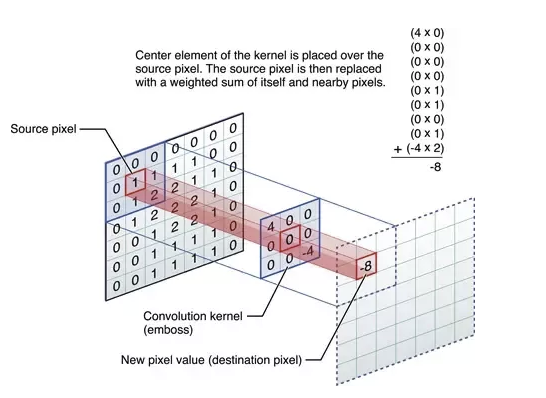

**The convolution filter has an input user (i.e., filter size). The filter content is learnt from network. **




# Pooling, stride, pading cocepts and calculations 


# Pooling

**Pooling** is a form of non-linear down-sampling. There are several non-linear functions to implement pooling among which max pooling is the most common. 

**Max-pool**: It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum. 

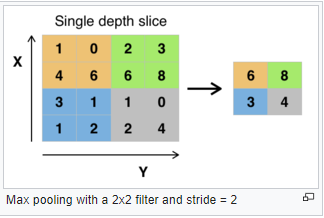




# Stride and pading cocepts and calculations 


[article](https://arxiv.org/pdf/1603.07285.pdf)

[Its github](https://github.com/vdumoulin/conv_arithmetic)



# The whole calculation illustrations and visualization 

[Visual example](http://cs231n.github.io/convolutional-networks/#conv)

http://machinelearninguru.com/computer_vision/basics/convolution/convolution_layer.html


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
cfg.gpu_options.per_process_gpu_memory_fraction=0.333
K.set_session(K.tf.Session(config=cfg))

# Fashion-MNIST database of fashion articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot



In [9]:
#Load the data


from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [10]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Filters 32 and 64 and relu.. 3 layers 

# Parameters = 32 * 3 * 3 +32 = 320
# Parameters = 64*3*3*32+64= 18,496

# Too huge number of paramters => overfiting

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 9')

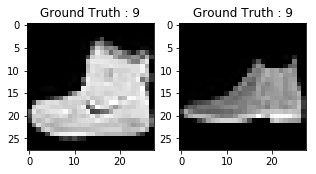

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [13]:
#What is -1 refers in the reshape

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [15]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [17]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [18]:
import keras
import tensorflow as tf

# Define your own leak Relu
"""Batch Normalization is to increase the stability of a neural network, 
   batch normalization normalizes the output of a previous activation layer by,
   subtracting the batch mean and dividing by the batch standard deviation.
   Link: https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c
"""

from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
def lrelu(x,alpha):
  return tf.nn.relu(x) - alpha * tf.nn.relu(-x)

With Batch Normalization

In [33]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))             
fashion_model.add(Dense(num_classes, activation='softmax'))

In [34]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [35]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
lambda_7 (Lambda)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
lambda_8 (Lambda)            (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [36]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 22s 463us/step - loss: 0.4614 - acc: 0.8314 - val_loss: 0.3317 - val_acc: 0.8784
Epoch 2/20
48000/48000 [==============================] - 22s 454us/step - loss: 0.2869 - acc: 0.8955 - val_loss: 0.2930 - val_acc: 0.8912
Epoch 3/20
48000/48000 [==============================] - 22s 453us/step - loss: 0.2401 - acc: 0.9121 - val_loss: 0.2569 - val_acc: 0.9033
Epoch 4/20
48000/48000 [==============================] - 22s 453us/step - loss: 0.2073 - acc: 0.9229 - val_loss: 0.2293 - val_acc: 0.9174
Epoch 5/20
48000/48000 [==============================] - 22s 453us/step - loss: 0.1814 - acc: 0.9325 - val_loss: 0.2506 - val_acc: 0.9117
Epoch 6/20
48000/48000 [==============================] - 22s 452us/step - loss: 0.1567 - acc: 0.9415 - val_loss: 0.2442 - val_acc: 0.9162
Epoch 7/20
48000/48000 [==============================] - 22s 455us/step - loss: 0.1333 - acc: 0.9505 - val_loss: 0.

In [37]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.467139060905762
Test accuracy: 0.9182


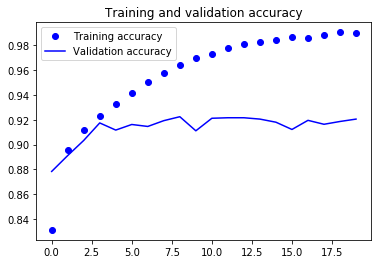

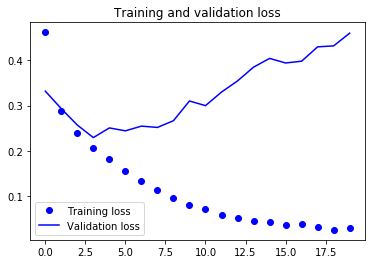

In [38]:
import matplotlib.pyplot as plt
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With Batch Normalization

In [22]:

batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(BatchNormalization())
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(BatchNormalization())
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(BatchNormalization())
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))             
fashion_model.add(Dense(num_classes, activation='softmax'))

In [23]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
lambda_4 (Lambda)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
lambda_5 (Lambda)            (None, 14, 14, 64)        0         
__________

In [25]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [30]:
fashion_train= fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0090 - acc: 0.9967 - val_loss: 0.4606 - val_acc: 0.9191
Epoch 2/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0106 - acc: 0.9964 - val_loss: 0.5043 - val_acc: 0.9132
Epoch 3/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.4244 - val_acc: 0.9227
Epoch 4/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0079 - acc: 0.9976 - val_loss: 0.4550 - val_acc: 0.9203
Epoch 5/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0076 - acc: 0.9975 - val_loss: 0.4615 - val_acc: 0.9210
Epoch 6/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0118 - acc: 0.9961 - val_loss: 0.4918 - val_acc: 0.9203
Epoch 7/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.0083 - acc: 0.9976 - val_loss: 0.5218 - val_acc

In [31]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6495064873978496
Test accuracy: 0.905


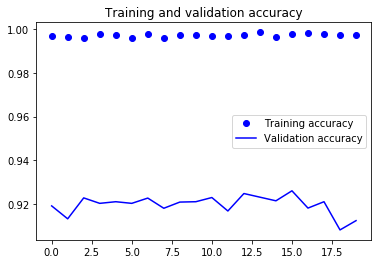

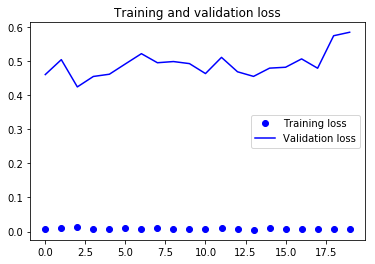

In [32]:
# Let us check overfit
import matplotlib.pyplot as plt
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Dropout Regularization

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.[relative link](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

## Training Phase:
Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

## Testing Phase:
Use all activations, but reduce them by a factor p (to account for the missing activations during training).

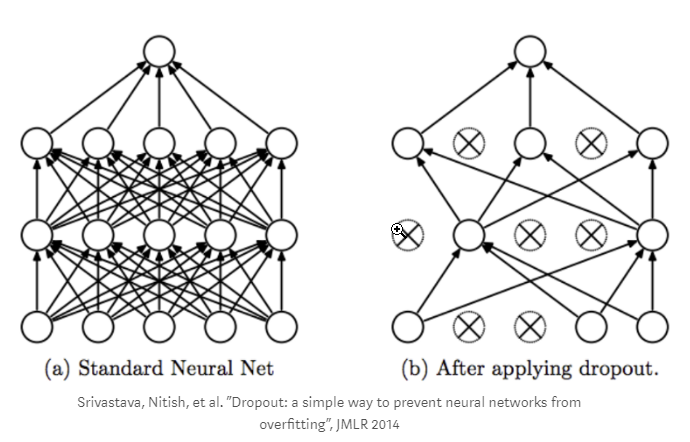

[relative link](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)


In [39]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))         
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [40]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
lambda_10 (Lambda)           (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
lambda_11 (Lambda)           (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
__________

In [41]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [42]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 26s 544us/step - loss: 0.6177 - acc: 0.7697 - val_loss: 0.3824 - val_acc: 0.8594
Epoch 2/20
48000/48000 [==============================] - 25s 530us/step - loss: 0.3877 - acc: 0.8582 - val_loss: 0.3180 - val_acc: 0.8814
Epoch 3/20
48000/48000 [==============================] - 25s 529us/step - loss: 0.3377 - acc: 0.8762 - val_loss: 0.2848 - val_acc: 0.8914
Epoch 4/20
48000/48000 [==============================] - 25s 530us/step - loss: 0.3078 - acc: 0.8859 - val_loss: 0.2637 - val_acc: 0.9040
Epoch 5/20
48000/48000 [==============================] - 25s 530us/step - loss: 0.2864 - acc: 0.8939 - val_loss: 0.2541 - val_acc: 0.9025
Epoch 6/20
48000/48000 [==============================] - 25s 529us/step - loss: 0.2714 - acc: 0.8993 - val_loss: 0.2395 - val_acc: 0.9130
Epoch 7/20
48000/48000 [==============================] - 25s 530us/step - loss: 0.2614 - acc: 0.9024 - val_loss: 0.

In [43]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 2s 221us/step
Test loss: 0.2187150344789028
Test accuracy: 0.9205


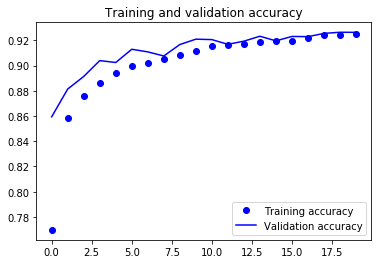

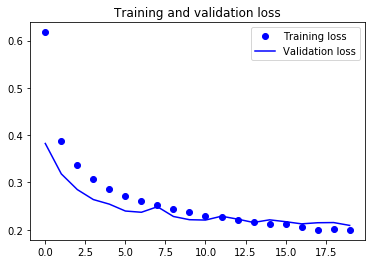

In [44]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.77      0.90      0.83      1000
    Class 1       0.99      0.98      0.99      1000
    Class 2       0.84      0.91      0.87      1000
    Class 3       0.95      0.90      0.92      1000
    Class 4       0.89      0.85      0.87      1000
    Class 5       0.99      0.98      0.98      1000
    Class 6       0.82      0.71      0.76      1000
    Class 7       0.95      0.98      0.97      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.92      0.92      0.92     10000



# Neural network fine-tuning techniques


[relative link](https://cambridgespark.com/content/tutorials/neural-networks-tuning-techniques/index.html)

1. L2 regularisation
2. Initialisation
3. Batch normalisation
4. Data augmentation
5. Ensemble methods
6. Early stopping


In [46]:
# Need to work in 6 groups: modify the code per each method

from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 12 # we iterate twelve times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth = 32 # use 32 kernels in both convolutional layers
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 128 # there will be 128 neurons in both hidden layers

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(X_train.shape[0], height, width, depth)
X_test = X_test.reshape(X_test.shape[0], height, width, depth)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(height, width, depth)) # N.B. TensorFlow back-end expects channel dimension last
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
flat = Flatten()(drop_1)
hidden = Dense(hidden_size, activation='relu')(flat) # Hidden ReLU layer
drop = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop) # Output softmax layer

model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 32s 601us/step - loss: 0.2947 - acc: 0.9088 - val_loss: 0.0569 - val_acc: 0.9845
Epoch 2/12
54000/54000 [==============================] - 32s 592us/step - loss: 0.0998 - acc: 0.9704 - val_loss: 0.0461 - val_acc: 0.9878
Epoch 3/12
54000/54000 [==============================] - 32s 595us/step - loss: 0.0735 - acc: 0.9776 - val_loss: 0.0414 - val_acc: 0.9902
Epoch 4/12
54000/54000 [==============================] - 32s 593us/step - loss: 0.0615 - acc: 0.9803 - val_loss: 0.0391 - val_acc: 0.9895
Epoch 5/12
54000/54000 [==============================] - 32s 594us/step - loss: 0.0538 - acc: 0.9834 - val_loss: 0.0342 - val_acc: 0.9905
Epoch 6/12
54000/54000 [==============================] - 32s 594us/step - loss: 0.0466 - acc: 0.9854 - val_loss: 0.0352 - val_acc: 0.9908
Epoch 7/12
54000/54000 [==============================] - 32s 594us/step - loss: 0.0412 - acc: 0.9873 - val_loss: 0.0

[0.02766745686383929, 0.991]